In [25]:
#Data Load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

pd.set_option('display.max.colwidth', 50)
pd.set_option('display.width', 1000)

materials = ["PC", "PA66", "ABS", "PCSMOG", "TPU"]

raw_dataset = pd.read_excel('../../data/iae/injection_mold_5000_v1.xlsx', header=0, index_col=False)
print("* Raw dataset size : ", len(raw_dataset))

selected_dataset = raw_dataset.loc[raw_dataset['material'] == "PA66"]
print("* Selected dataset size : ", len(selected_dataset))

dataset = selected_dataset[["weight", "failure", "material", "set_nozzle_temperature", "set_front_temperature", "set_intermediate_temperature", "set_rear_temperature", "set_mold_velocity_1", "set_mold_velocity_2", "set_mold_velocity_3", "set_mold_velocity_4", "set_mold_velocity_5", "set_mold_pressure_1", "set_mold_pressure_2", "set_mold_pressure_3", "set_mold_pressure_4", "set_mold_pressure_5", "set_mold_position_1", "set_mold_position_2", "set_mold_position_3", "set_mold_position_4", "set_mold_position_5", "set_hold_velocity_1", "set_hold_velocity_2", "set_hold_velocity_3", "set_hold_pressure_1", "set_hold_pressure_2", "set_hold_pressure_3"]]
print(dataset)

positive_set = dataset.where(dataset["failure"]==0).dropna()
print("Positive Data : ", len(positive_set))
positive_X = positive_set[["set_nozzle_temperature", "set_front_temperature", "set_intermediate_temperature", "set_rear_temperature", "set_mold_velocity_1", "set_mold_velocity_2", "set_mold_velocity_3", "set_mold_velocity_4", "set_mold_velocity_5", "set_mold_pressure_1", "set_mold_pressure_2", "set_mold_pressure_3", "set_mold_pressure_4", "set_mold_pressure_5", "set_mold_position_1", "set_mold_position_2", "set_mold_position_3", "set_mold_position_4", "set_mold_position_5", "set_hold_velocity_1", "set_hold_velocity_2", "set_hold_velocity_3", "set_hold_pressure_1", "set_hold_pressure_2", "set_hold_pressure_3"]]
print("Positive X : ", len(positive_X))

negative_set = dataset.where(dataset["failure"]==1 | dataset["failure"]==2 | dataset["failure"]==3).dropna()
print("Negative Data : ", len(negative_set))
negative_X = negative_set[["set_nozzle_temperature", "set_front_temperature", "set_intermediate_temperature", "set_rear_temperature", "set_mold_velocity_1", "set_mold_velocity_2", "set_mold_velocity_3", "set_mold_velocity_4", "set_mold_velocity_5", "set_mold_pressure_1", "set_mold_pressure_2", "set_mold_pressure_3", "set_mold_pressure_4", "set_mold_pressure_5", "set_mold_position_1", "set_mold_position_2", "set_mold_position_3", "set_mold_position_4", "set_mold_position_5", "set_hold_velocity_1", "set_hold_velocity_2", "set_hold_velocity_3", "set_hold_pressure_1", "set_hold_pressure_2", "set_hold_pressure_3"]]
print("Negative X : ", len(negative_X))

positive_y = positive_set[["weight"]]
print("Positive y : ", len(positive_y))
negative_y = negative_set[["weight"]]
print("Negative y : ", len(negative_y))

data_columns = positive_X.columns.to_numpy()

* Raw dataset size :  4977
* Selected dataset size :  282
    weight  failure material  set_nozzle_temperature  set_front_temperature  set_intermediate_temperature  set_rear_temperature  set_mold_velocity_1  set_mold_velocity_2  set_mold_velocity_3  ...  set_mold_position_2  set_mold_position_3  set_mold_position_4  set_mold_position_5  set_hold_velocity_1  set_hold_velocity_2  set_hold_velocity_3  set_hold_pressure_1  set_hold_pressure_2  set_hold_pressure_3
82     111        1     PA66                     290                    250                           250                   240                   60                   50                    0  ...                    1                    0                    0                    0                  100                    0                    0                   85                    0                    0
83     NaN        1     PA66                     290                    250                           250                   240   

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Trainset R2 Score : 0.6096794107977872
Testset R2 Score : 0.15551937726643716
* K-fold Cross validation scores :
[1.48270076 1.00487862 1.00338297 0.81870732 6.47765834]
Average MAPE : 2.16 %
2.72376303739425
* Mean Absolute Percentage Error (@positive, trainset) :  0.5608622329938249
* Mean Absolute Percentage Error (@positive, testset) :  1.0277583222397095
Train :  [205 207 211 210 208 208 205 210 207 208 201 209 210 208 214 213 211 214
 210 225 206 205 210 207 212 210 209 208 210 210 209 208 212 211 211 208
 211 210 211 204 207 207 212 207 209 207 211 207 207 209 202 212 205 214
 210 209 210 208 201 205 208 208 206 209 213 210 213 209 210 210 205 208
 209 208 206 208 213 211 209 209 208 212 208 211 205 204 207 209 208 208
 205 208 212 216 208 208]
Train Predict :  [210.52941176 209.4        214.29333333 205.         209.83333333
 206.75       206.66666667 210.52941176 210.52941176 209.279
 207.41666667 209.66666667 209.83333333 208.33333333 211.01116667
 212.         207.19833333 2

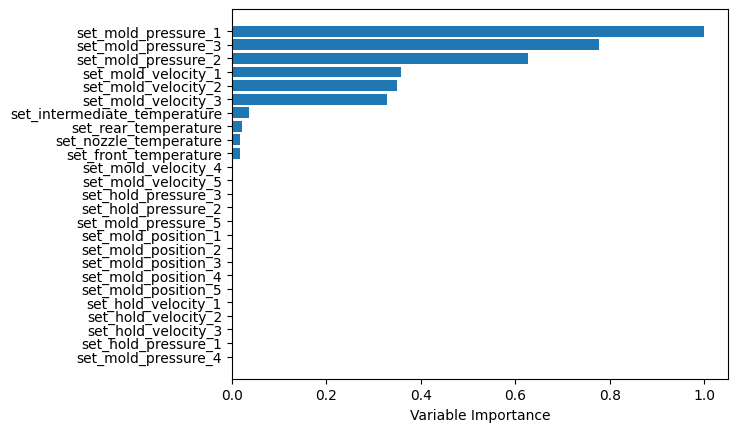

In [22]:
X_train, X_test, y_train, y_test = train_test_split(positive_X, np.ravel(positive_y), test_size=0.33, shuffle=True)
model = RandomForestRegressor(max_depth=10, max_features=5, oob_score=False, bootstrap=False).fit(X_train, y_train)
#model = BaggingRegressor(base_estimator=None, max_features=5).fit(X_train, y_train)

y_pred_trainset = model.predict(X_train)
y_pred_testset = model.predict(X_test)

print("Trainset R2 Score :", (r2_score(y_train, y_pred_trainset))) 
print("Testset R2 Score :", (r2_score(y_test, y_pred_testset)))
# print("Number of Train Samples : ", len(X_train))

print("* K-fold Cross validation scores :")
scores = cross_val_score(model, positive_X, np.ravel(positive_y), cv=5, scoring="neg_mean_absolute_percentage_error")*-100
print(scores)
print("Average MAPE : %0.2f %%"%scores.mean())
#print("Average Score : %0.2f (standard deviation : %0.2f)"% scores.mean(), scores.std())
#print("* %0.2f accuracy with a standard deviation of %0.2f" % scores.mean(), scores.std())

# feature importances
prediction = model.predict(X_train)
print(mean_squared_error(y_train, y_pred_trainset))
print("* Mean Absolute Percentage Error (@positive, trainset) : ", mean_absolute_percentage_error(y_train, y_pred_trainset)*100)
print("* Mean Absolute Percentage Error (@positive, testset) : ", mean_absolute_percentage_error(y_test, y_pred_testset)*100)
print("Train : ", y_test)
print("Train Predict : ", y_pred_testset)
featureImportance = model.feature_importances_

# feature importance (ordering)
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, data_columns[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

